In [4]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 7.6 MB/s eta 0:00:20
    --------------------------------------- 2.4/150.0 MB 6.1 MB/s eta 0:00:25
    --------------------------------------- 3.4/150.0 MB 6.0 MB/s eta 0:00:25
   - -------------------------------------- 5.0/150.0 MB 6.4 MB/s eta 0:00:23
   - -------------------------------------- 6.0/150.0 MB 6.2 MB/s eta 0:00:24
   - -------------------------------------- 7.3/150.0 MB 6.3 MB/s eta 0:00:23
   -- ------------------------------------- 8.9/150.0 MB 6.3 MB/s eta 0:00:23
   -- ------------------------------------- 10.5/150.0 MB 6.5 MB/s eta 0:00:22
   --- ------------------------------------ 11.8/150.0 MB 6.6 MB/s eta 0:00:21
   --- ------------------------------------ 13.1/150.0 MB 6.6 MB/s eta 0:00:21
   --- ------------------------------------ 14.4/150.0 MB 6.5 MB/s eta 0:00:22
   ---- ----------------------------------- 15.5/150.0 MB 6.4 MB/s 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    VotingClassifier
)
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('datasets/Loan.csv')

In [11]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
if 'Dependents' in df.columns:
    df['Dependents'] = df['Dependents'].replace('3+', '3')
    df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')

In [13]:
if 'LoanAmount' in df.columns:
    df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [14]:
if 'Credit_History' in df.columns:
    df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [15]:
df.dropna(inplace=True)

In [30]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']

In [35]:
cat_col

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [36]:
le = LabelEncoder()

In [37]:
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [46]:
df.drop('Loan_ID', inplace=True, axis=1)

In [47]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


Text(0.5, 1.0, 'Loan Approval Distribution')

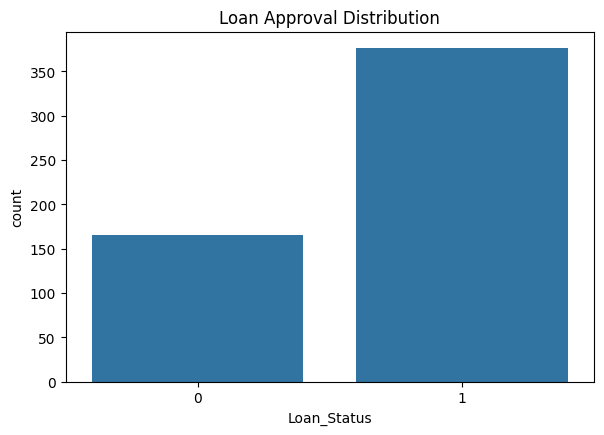

In [39]:
plt.figure(figsize=(15,10))
# Loan Status Distribution
plt.subplot(2,2,1)
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Approval Distribution')

Text(0.5, 1.0, 'Income vs Loan Amount')

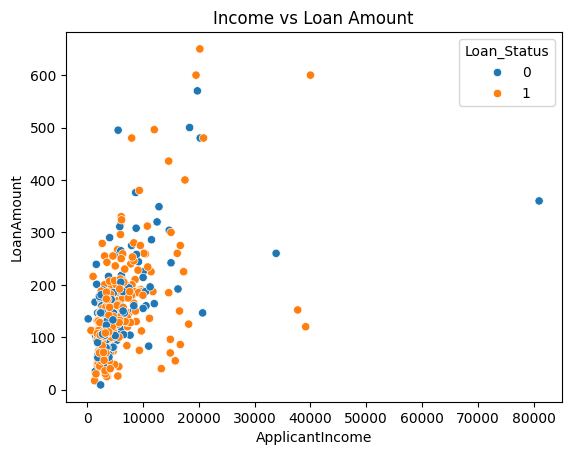

In [41]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df)
plt.title('Income vs Loan Amount')

Text(0.5, 1.0, 'Credit History Impact on Loan Approval')

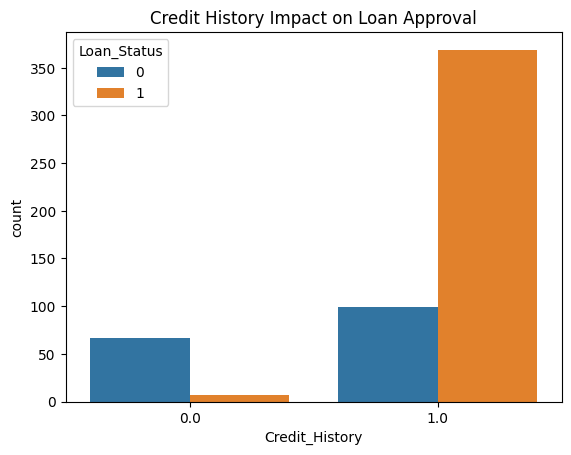

In [42]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title('Credit History Impact on Loan Approval')

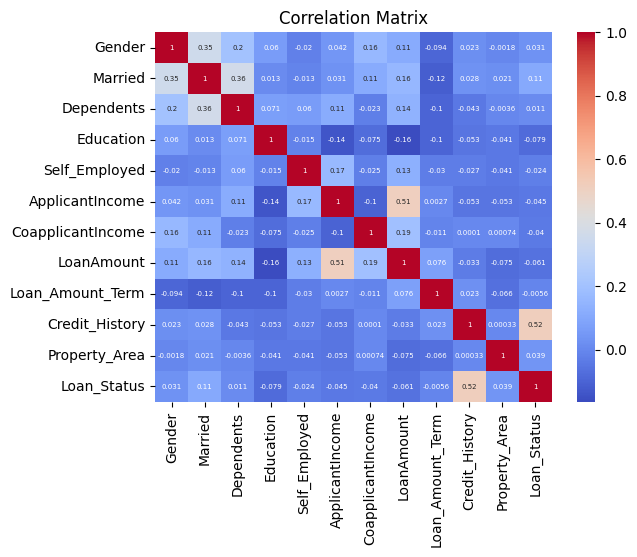

In [55]:
sns.heatmap(df.corr(), annot=True,  annot_kws={"size": 5}, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.show()

In [56]:
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
adb = AdaBoostClassifier(n_estimators=50, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [59]:
# Voting Classifier (soft voting)
ensemble = VotingClassifier(estimators=[('rf', rf), ('adb', adb), ('gbc', gbc)], voting='soft')

In [60]:
# Train ensemble
ensemble.fit(X_train, y_train)

# Predict and evaluate
preds = ensemble.predict(X_test)


Ensemble Model Performance:
Accuracy: 0.7239263803680982
              precision    recall  f1-score   support

           0       0.59      0.37      0.46        51
           1       0.76      0.88      0.81       112

    accuracy                           0.72       163
   macro avg       0.67      0.63      0.64       163
weighted avg       0.71      0.72      0.70       163



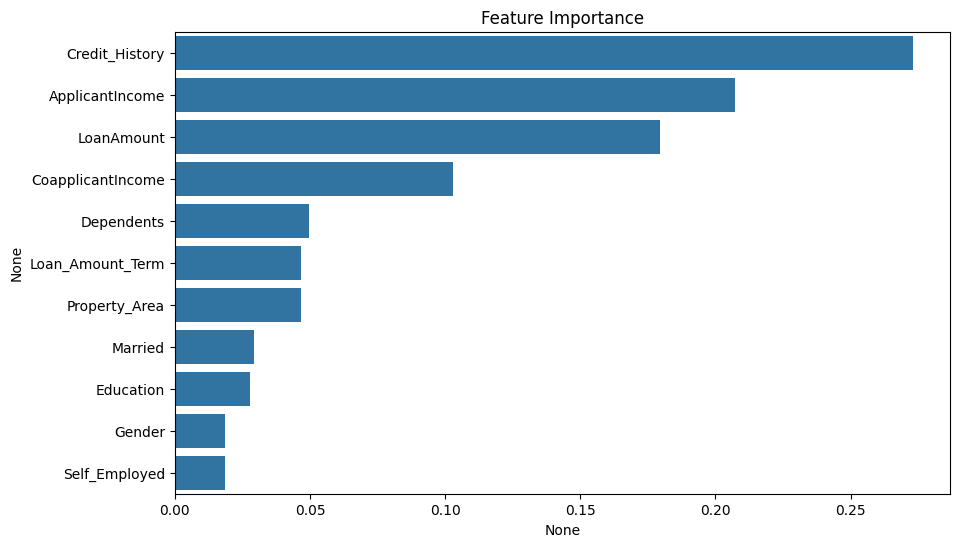

In [61]:
print("\nEnsemble Model Performance:")
print("Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

# Feature Importance from Random Forest
feature_importance = pd.Series(ensemble.named_estimators_['rf'].feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.show()